In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
pubg = pd.read_csv('data.csv')

In [3]:
pubg.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
pubg.shape


(1111742, 30)

In [5]:
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [6]:
pubg.dtypes.value_counts()

int64      20
float64     6
object      4
dtype: int64

In [7]:
pubg.isna().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
pubg = pubg.dropna()

In [11]:
pubg.shape

(1111741, 30)

Now data is cleanded with no missing values

## Unique count of iD, groupId and matchId

In [13]:
for i in ['Id','groupId','matchId']:
    print('unique {} count: '.format(i), pubg[i].nunique())

unique Id count:  1111741
unique groupId count:  870621
unique matchId count:  47950


## Exploring Different Match Type

In [14]:
pubg['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133853
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

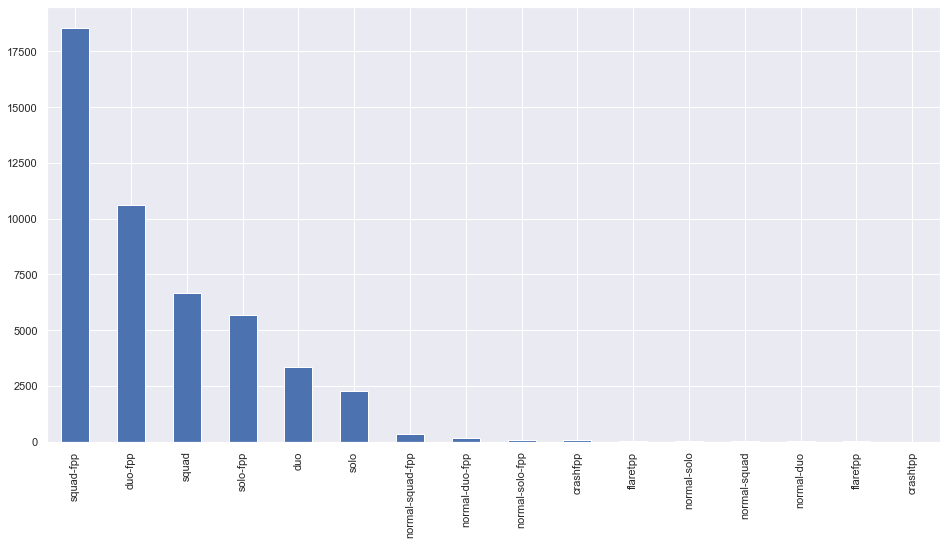

In [25]:
pubg.groupby('matchId')['matchType'].first().value_counts().plot.bar();

In [26]:
#refineing matchType
pubg['matchType'] = pubg['matchType'].replace(['normal-solo','normal-solo-fpp','solo-fpp'],'solo')
pubg['matchType'] = pubg['matchType'].replace(['normal-duo-fpp','crashfpp','duo-fpp','crashtpp','normal-duo'],'duo')
pubg['matchType'] = pubg['matchType'].replace(['normal-squad','flarefpp','flaretpp','normal-squad-fpp','squad-fpp'],'squad')

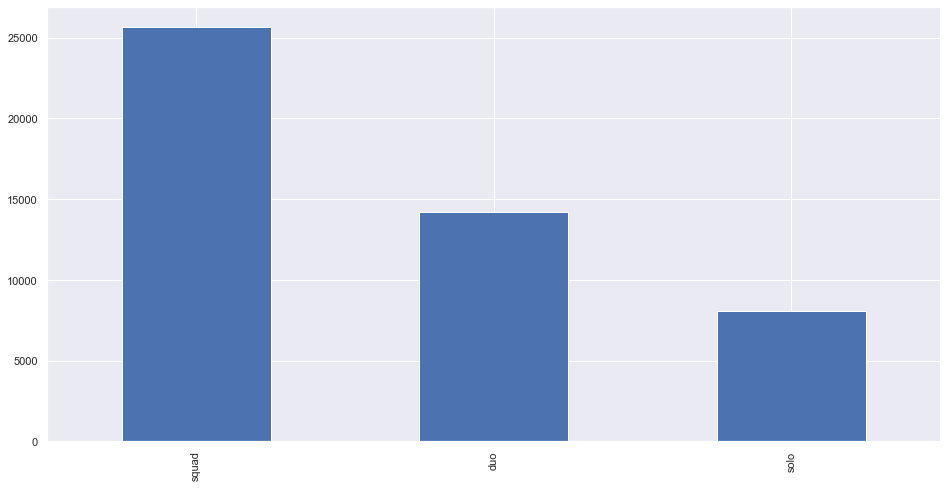

In [27]:
pubg.groupby('matchId')['matchType'].first().value_counts().plot.bar();

## Checking correlation between feature

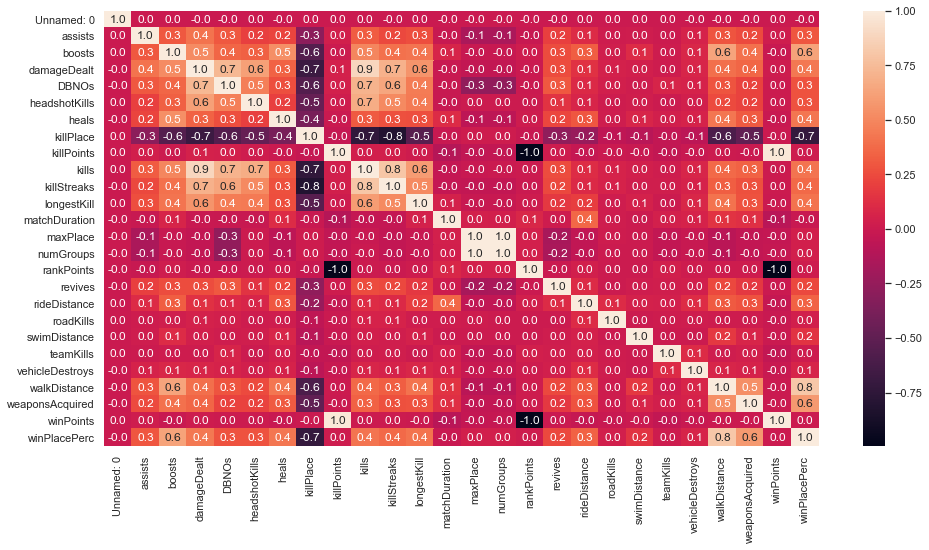

In [29]:
sns.heatmap(pubg.corr(), annot=True, fmt='.1f');

## observations:
1. boosts have .6 correlation
2. walkdistance .8 correlation
3. weaponsAcquired .6 

In [32]:
print('on an avarage a person kills {} players'.format(pubg['kills'].mean()))
print('99% of people have {} kills or less'.format(pubg['kills'].quantile(0.99)) )
print('maximum kills ever recoreded is {}'.format(pubg['kills'].max()))

on an avarage a person kills 0.9255105280816305 players
99% of people have 7.0 kills or less
maximum kills ever recoreded is 72


Text(0.5, 1.0, 'Kill count')

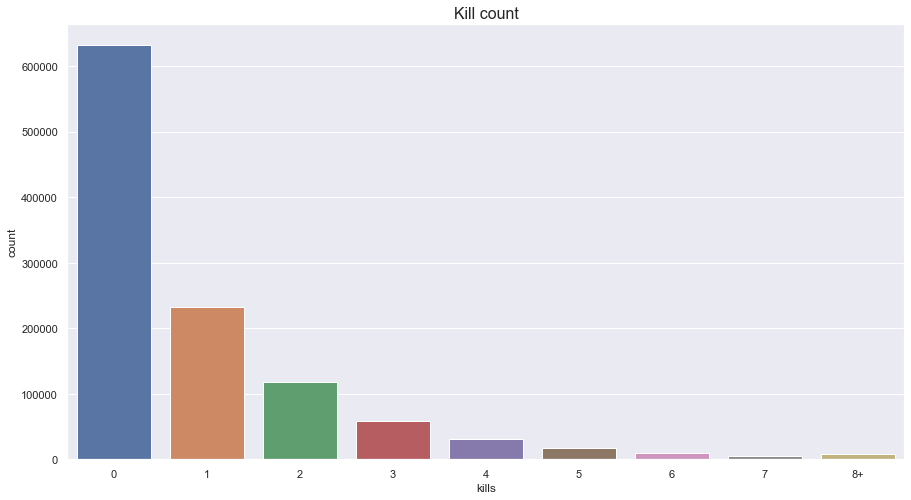

In [34]:
df=pubg.copy()
df.loc[df['kills']>df['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(df['kills'].astype(str).sort_values());
plt.title('Kill count', fontsize=16)


Most player didn't make a single kill, but they dealt with damage

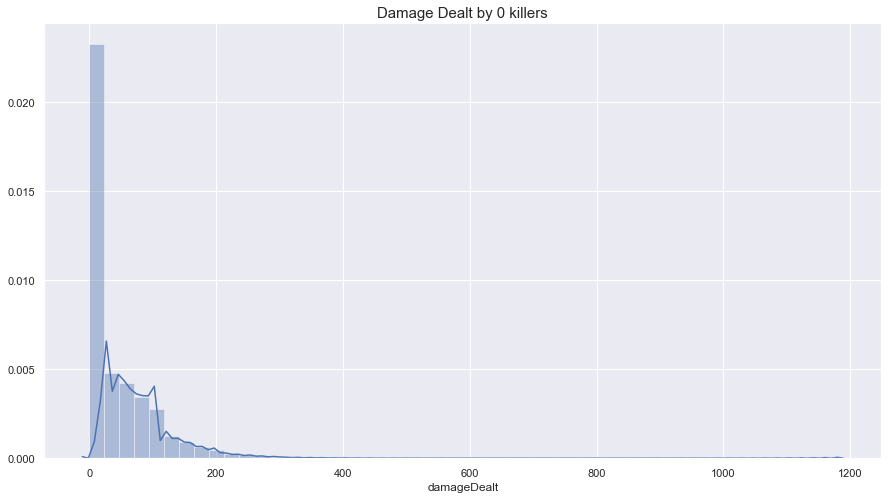

In [35]:
df=pubg.copy()
df=df[df['kills']==0]
plt.figure(figsize=(15,8))
plt.title('Damage Dealt by 0 killers', fontsize=15)
sns.distplot(df['damageDealt'])

There are few people who win without even making a single kill or dealing with damage.

In [37]:
print('Total {} players ({:.4f}%) have won without a single kill'.format(len(pubg[pubg['winPlacePerc']==1]), 100*len(pubg[pubg['winPlacePerc']==1])/len(pubg)))


Total 31853 players (2.8651%) have won without a single kill


### Effect of Killing on Winning percentage

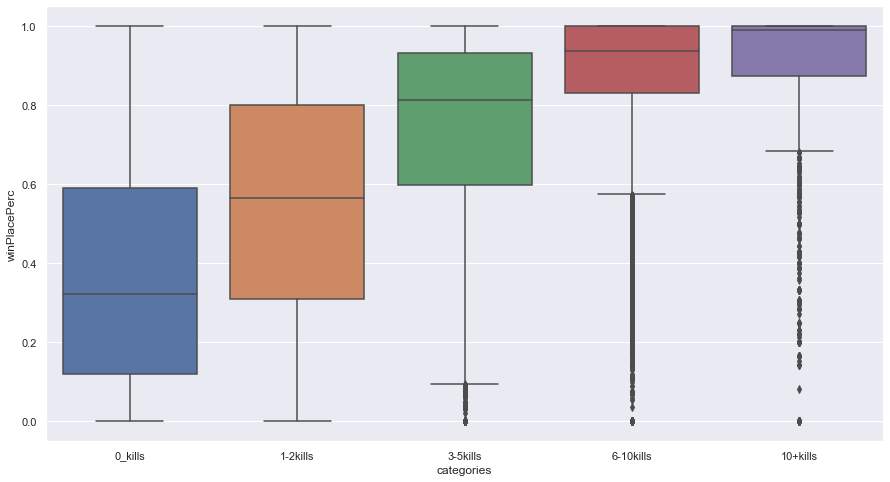

In [39]:
kills = pubg.copy()
kills['categories']=pd.cut(kills['kills'], [-1, 0, 2,5,10,60], labels=['0_kills','1-2kills','3-5kills','6-10kills','10+kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x='categories', y='winPlacePerc', data=kills);


observation: Kills has a high correlation with winPlacePrec

### walkDistance analysis

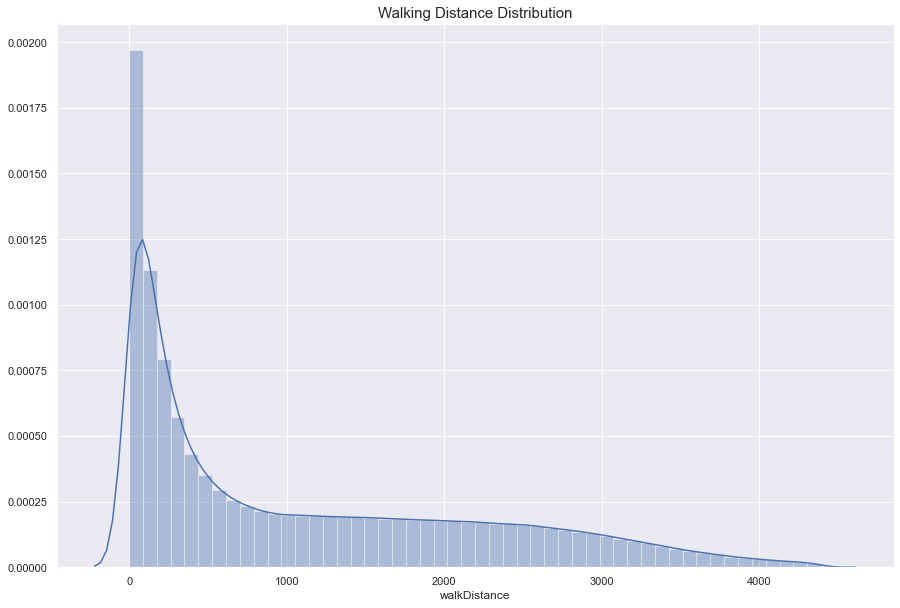

In [40]:
df = pubg.copy()
df=df[df['walkDistance']<pubg['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title('Walking Distance Distribution',fontsize=15)
sns.distplot(df['walkDistance'])

Observation : Many players die before even walking

### Effect of running on Winning %

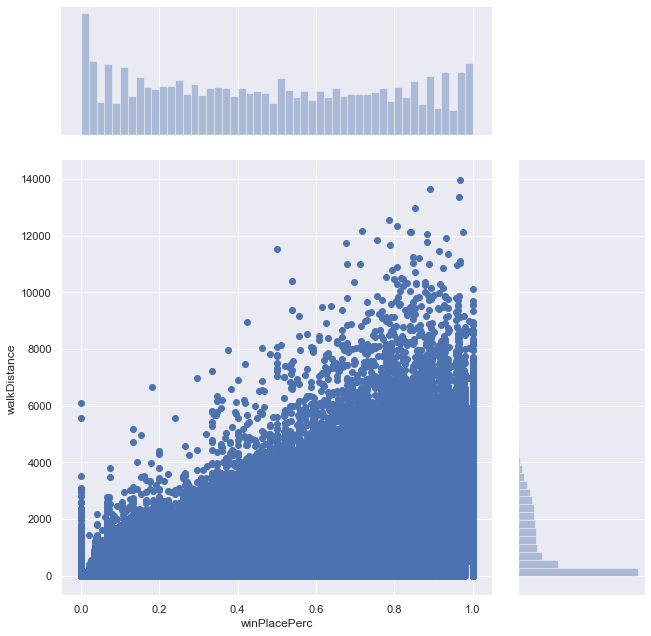

In [45]:
sns.jointplot(x='winPlacePerc', y='walkDistance', data=pubg, height=9, ratio=3)

Walking has high correlation with win prediction

### Effect of Riding on Winning %

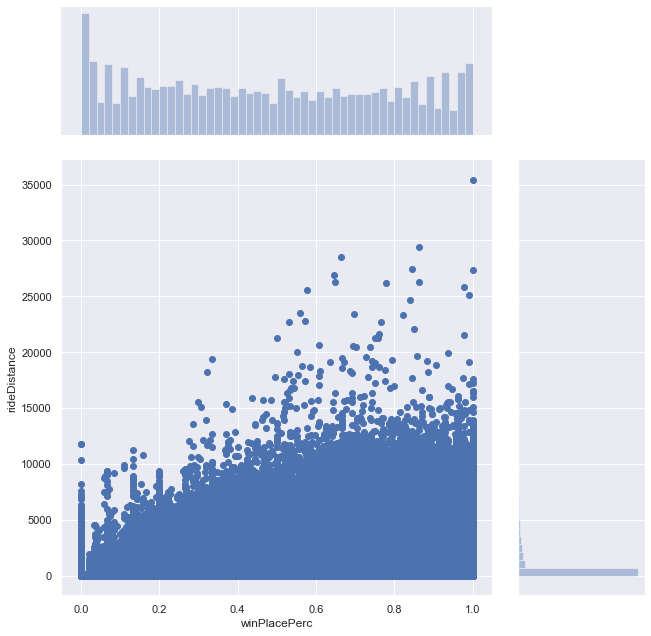

In [47]:
sns.jointplot(x='winPlacePerc', y='rideDistance', data=pubg, height=9, ratio=3)

Small correlation between riding and winning

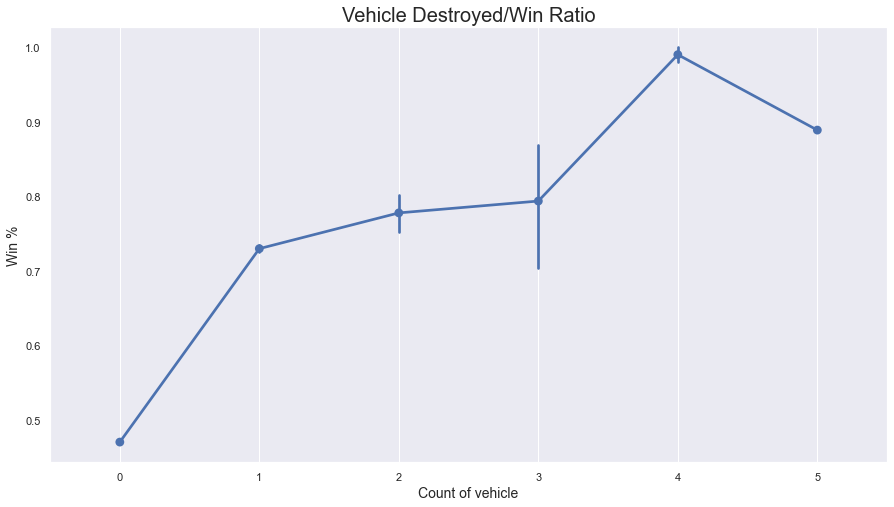

In [48]:
fig , ax = plt.subplots(figsize=(15,8))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=pubg, alpha=.5)
plt.xlabel('Count of vehicle', fontsize=14)
plt.ylabel('Win %', fontsize=14)
plt.title('Vehicle Destroyed/Win Ratio', fontsize=20)
plt.grid()